In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib  inline

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import accuracy_score, roc_auc_score
from scipy.stats import skew
from sklearn.model_selection import KFold, cross_val_score

# 情報確認

In [2]:
train =  pd.read_csv('train.csv')
train

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


In [3]:
test = pd.read_csv('test.csv')
test

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,47340,I,144.74,material_7,material_5,9,5,0,4,9,...,18.573,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466
20771,47341,I,74.53,material_7,material_5,9,5,4,8,7,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
20772,47342,I,67.73,material_7,material_5,9,5,10,11,2,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349
20773,47343,I,126.15,material_7,material_5,9,5,8,16,11,...,19.575,12.672,15.422,19.496,9.319,15.817,17.403,16.437,15.179,745.210


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20775 entries, 0 to 20774
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20775 non-null  int64  
 1   product_code    20775 non-null  object 
 2   loading         20552 non-null  float64
 3   attribute_0     20775 non-null  object 
 4   attribute_1     20775 non-null  object 
 5   attribute_2     20775 non-null  int64  
 6   attribute_3     20775 non-null  int64  
 7   measurement_0   20775 non-null  int64  
 8   measurement_1   20775 non-null  int64  
 9   measurement_2   20775 non-null  int64  
 10  measurement_3   20446 non-null  float64
 11  measurement_4   20366 non-null  float64
 12  measurement_5   20267 non-null  float64
 13  measurement_6   20151 non-null  float64
 14  measurement_7   20055 non-null  float64
 15  measurement_8   19929 non-null  float64
 16  measurement_9   19871 non-null  float64
 17  measurement_10  19708 non-null 

<AxesSubplot:>

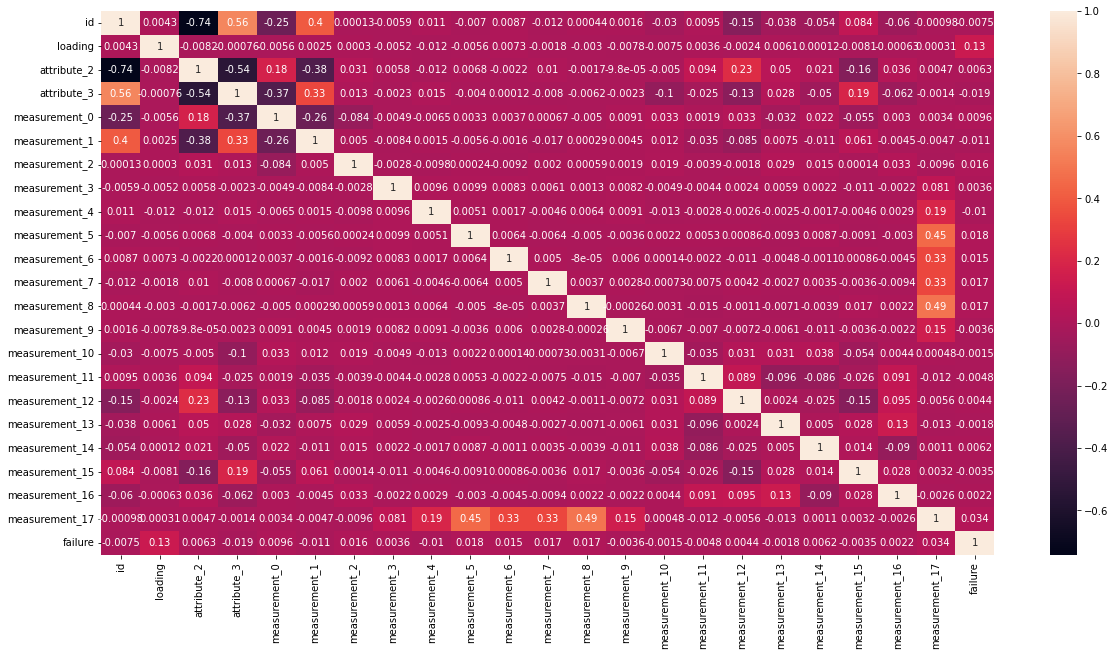

In [28]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(),annot=True)

['A' 'B' 'C' 'D' 'E']


<AxesSubplot:xlabel='product_code', ylabel='failure'>

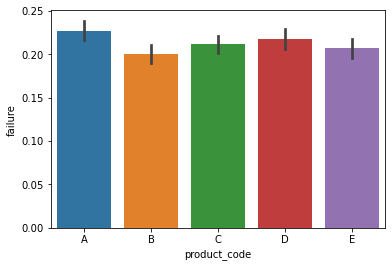

In [21]:
print(train['product_code'].unique())

sns.barplot(data=train, x=train['product_code'], y=train['failure'])

# Product_Code

## A: material_7, material_8, 9, 5
## B: material_5, material_5, 8, 8
## C: material_7, material_8, 5, 8
## D: material_7, material_5, 6, 6
## E: material_7, material_6, 6, 9
## F: material_5, material_6, 6, 4
## G: material_5, material_6, 9, 7
## H: material_7, material_7, 7, 9
## I:  material_7, material_5, 9, 5

# Attribute0~3 いらない

## NaN は Product_code 別の平均値で埋める 
## それぞれのAttribute に関係がある Measurement をヒートマップで探す
## 相関係数のプラスマイナスで和を取る？

In [24]:
train = train.drop(columns = ['id', 'attribute_0', 'attribute_1', 'attribute_2', 'attribute_3'])                                                     
test = test.drop(columns = ['id', 'attribute_0', 'attribute_1', 'attribute_2', 'attribute_3'])

In [26]:
train.describe()

,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26320.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,25633.000000,25522.000000,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,127.826233,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,11.716624,19.024714,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,39.030020,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,1.000836,1.008591,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,33.160000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,7.968000,15.217000,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,99.987500,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,16.839000,11.045000,18.340250,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,122.390000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,17.516000,11.712000,19.021000,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,149.152500,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,18.178000,12.391000,19.708000,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,385.860000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,15.419000,23.807000,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


<AxesSubplot:>

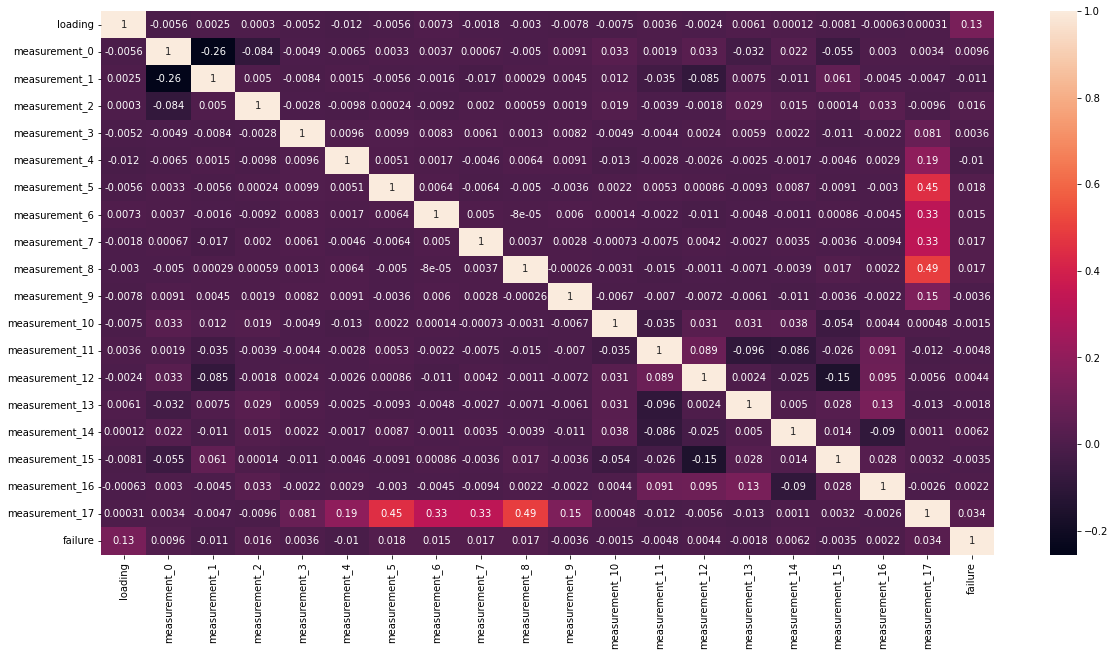

In [25]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(),annot=True)

# loading だけ相関があるので、これだけ残して機械学習(start)

In [6]:
train_start = train[['id', 'product_code', 'loading']]
train_start_y = train[['failure']]
test_start = test[['id', 'product_code', 'loading']]
test_index = test[['id']]
train_start

,id,product_code,loading
0,0,A,80.10
1,1,A,84.89
2,2,A,82.43
3,3,A,101.07
4,4,A,188.06
...,...,...,...
26565,26565,E,158.95
26566,26566,E,146.02
26567,26567,E,115.62
26568,26568,E,106.38


In [11]:
train_start[['loading']] = train_start[['loading']].fillna(train_start[['loading']].mean)
train_start[['loading']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   loading  26570 non-null  object
dtypes: object(1)
memory usage: 207.7+ KB


C:\Users\sibuya yuuki\AppData\Local\Temp\ipykernel_13908\1918864845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_start[['loading']] = train_start[['loading']].fillna(train_start[['loading']].mean)


In [16]:
from sklearn.linear_model import Lasso,LassoCV

alphas = 10**np.linspace(-5, 10, 500)

Lasso_cv = LassoCV(alphas=alphas, cv=10)
Lasso_cv.fit(train_start, train_start_y)
print(f"best_alpha:{Lasso_cv.alpha_}")

Lasso = Lasso(alpha=Lasso_cv.alpha_)
Lasso.fit(train_start, train_start_y)
print(f"fit_score:{Lasso.score(train_start, train_start_y)}")
Lasso_train_start_y_pred = Lasso.predict(test_start)
Lasso_train_start_y_pred

TypeError: float() argument must be a string or a number, not 'method'

In [ ]:
# マイナスの処理

result_start = pd.concat([test_index, pd.Series(Lasso_train_start_y_pred)], axis=1)
result_start.columns = ['id','failure']
#sub0['count'][sub0['count'] < 0] = 0
result_start

In [ ]:
result_start.to_csv('tabular_lasso.csv', index = False)

# Failureに対する相関係数の正負で和を取ってみる(step1)

In [ ]:
# https://www.kaggle.com/code/anubhavgoyal10/tps-august-logistic-regression-score-0-584

In [12]:
target = train['failure']
test_ids = test['id']

In [13]:
train.drop(['failure', 'id'], axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
# train と test を結合したほうがいい
data0 = pd.concat([train, test], axis=0).reset_index(drop=True)

In [15]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47345 entries, 0 to 47344
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    47345 non-null  object 
 1   loading         46872 non-null  float64
 2   attribute_0     47345 non-null  object 
 3   attribute_1     47345 non-null  object 
 4   attribute_2     47345 non-null  int64  
 5   attribute_3     47345 non-null  int64  
 6   measurement_0   47345 non-null  int64  
 7   measurement_1   47345 non-null  int64  
 8   measurement_2   47345 non-null  int64  
 9   measurement_3   46635 non-null  float64
 10  measurement_4   46398 non-null  float64
 11  measurement_5   46161 non-null  float64
 12  measurement_6   45925 non-null  float64
 13  measurement_7   45688 non-null  float64
 14  measurement_8   45451 non-null  float64
 15  measurement_9   45214 non-null  float64
 16  measurement_10  44978 non-null  float64
 17  measurement_11  44741 non-null 

In [16]:
# attribute は分類用なので数字で認識させる必要なし
data0[['attribute_2', 'attribute_3']] = data0[['attribute_2', 'attribute_3']].astype(str)

In [17]:
data0.isna().sum()

product_code         0
loading            473
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      710
measurement_4      947
measurement_5     1184
measurement_6     1420
measurement_7     1657
measurement_8     1894
measurement_9     2131
measurement_10    2367
measurement_11    2604
measurement_12    2841
measurement_13    3077
measurement_14    3314
measurement_15    3551
measurement_16    3788
measurement_17    4024
dtype: int64

In [20]:
data0['loading'].mean()

127.74233678955423

In [23]:
# とりあえず平均値で埋めてみる(理由はなし)
data0[['loading']] = data0[['loading']].fillna(data0['loading'].mean())
data0[['measurement_3']] = data0[['measurement_3']].fillna(data0['measurement_3'].mean())
data0[['measurement_4']] = data0[['measurement_4']].fillna(data0['measurement_4'].mean())
data0[['measurement_5']] = data0[['measurement_5']].fillna(data0['measurement_5'].mean())
data0[['measurement_6']] = data0[['measurement_6']].fillna(data0['measurement_6'].mean())
data0[['measurement_7']] = data0[['measurement_7']].fillna(data0['measurement_7'].mean())
data0[['measurement_8']] = data0[['measurement_8']].fillna(data0['measurement_8'].mean())
data0[['measurement_9']] = data0[['measurement_9']].fillna(data0['measurement_9'].mean())
data0[['measurement_10']] = data0[['measurement_10']].fillna(data0['measurement_10'].mean())
data0[['measurement_11']] = data0[['measurement_11']].fillna(data0['measurement_11'].mean())
data0[['measurement_12']] = data0[['measurement_12']].fillna(data0['measurement_12'].mean())
data0[['measurement_13']] = data0[['measurement_13']].fillna(data0['measurement_13'].mean())
data0[['measurement_14']] = data0[['measurement_14']].fillna(data0['measurement_14'].mean())
data0[['measurement_15']] = data0[['measurement_15']].fillna(data0['measurement_15'].mean())
data0[['measurement_16']] = data0[['measurement_16']].fillna(data0['measurement_16'].mean())
data0[['measurement_17']] = data0[['measurement_17']].fillna(data0['measurement_17'].mean())
data0.isna().sum()

product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

In [24]:
print(data0.shape)
data1 = pd.get_dummies(data0)
print(data1.shape)

(47345, 24)
(47345, 45)


In [27]:
# 標準化
s = StandardScaler()
s.fit(data1)
data2 = pd.DataFrame(s.transform(data1), index=data1.index, columns=data1.columns)

In [28]:
# データ分割
train_final = data2.loc[:train.index.max(), :].copy()
test_final = data2.loc[train.index.max() + 1:, :].reset_index(drop=True).copy()

In [30]:
model = LogisticRegression()
model.fit(train_final, target)
pred = model.predict_proba(test_final)[:, 1]
submission = pd.DataFrame(test_ids)
submission['failure'] = pred
submission.to_csv('./submission.csv', index= None)
submission

In [32]:
submission

,id,failure
0,26570,0.704504
1,26571,0.626555
2,26572,0.670842
3,26573,0.674789
4,26574,0.823685
...,...,...
20770,47340,0.529871
20771,47341,0.422222
20772,47342,0.392984
20773,47343,0.527462


In [ ]:
models = {
    'logistic regression' : LogisticRegression(),
    'xgboost' : XGBClassifier(),
    'catboost' : CatBoostClassifier(verbose=0),
    'lightbgm' : LGBMClassifier(),
    'gradient boosing' : GradientBoostingClassifier(),
    'naive bayes' : GaussianNB(),
    'random forest' : RandomForestClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(train_final, target)
    print(f'{name} trained')

In [ ]:
# KFold
results = {}

kf = KFold(n_splits= 10)

for name, model in models.items():
    result = cross_val_score(model, train_final, target, scoring= 'roc_auc', cv= kf)
    results[name] = result

In [ ]:
for name, result in results.items():
    print("----------------")
    print(f'{name} : {np.mean(result)}')

In [ ]:
"""
欠損値処理 https://qiita.com/maskot1977/items/ba4ed8a9ba2289204742
　検定
　KNNImputer
  IterativeImputer
  LGBMImputer
  simpleImputer
  
カテゴリ変数の数値化
　onehotencoding
  get_dummy
  
正規化標準化 https://helve-blog.com/posts/python/scikit-learn-feature-scaling/
　正規化:MinMax, Zscore, PowerTransformer, QuantileTransformer
  標準化:standardscaler, Robustscaler, minmaxscaler


探索的データ分析EDA
次元削減PCA, GA, RFE
指標AUC,ROC

クロスバリデーション
  KFold
  StratifiedKFold
  ShuffleSplit
  GroupKFold
  GridSearch

make_pipeline(Scaler(), Classifer())

lightGBM, Random, Decition, kNN, rogistic, XGBoost
ロバスト回帰、SVM
t-SNE



"""

# 案
## ロジスティック回帰 (2値問題だから)
## 相関関係が正のものと負のものを分けて足し算する?
## 相関0.1以上の組み合わせがないようにする
## object型は相関ない数字変更